# **Lista 4 - Questões 2, 3 e 4**

Ada Maris Pereira Mário - 12725432

In [11]:
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
import scipy.io as sio
import os
import random
import time
import sys
from matplotlib import rcParams
from scipy.linalg import eigh
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels.formula.api as smf

mpl.rcParams['figure.dpi'] = 100
#plt.rc('text',usetex=True)
mpl.rcParams['text.usetex'] = False


## **Questão 2**

**a)**

In [12]:
df1 = pd.read_csv('dados_temperatura_pressao.csv')

df1.head()

,Pressao,Temperatura
0,9.2,10
1,17.5,20
2,31.8,30
3,55.3,40
4,92.5,50


Modelo 1 (Primeira Ordem):

$$ Y = \beta_0 + X \beta_1 + \varepsilon $$

$$ \texttt{pressão} = \beta_0 + \beta_1 \times \texttt{temperatura} + \varepsilon $$

In [13]:
model1 = smf.ols(formula='Pressao ~ Temperatura',data=df1)
result1 = model1.fit()

y_pred1 = result1.predict()
resid1 = result1.resid

result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Pressao   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     37.59
Date:                Thu, 14 Dec 2023   Prob (F-statistic):            0.00359
Time:                        00:42:11   Log-Likelihood:                -24.807
No. Observations:                   6   AIC:                             53.61
Df Residuals:                       4   BIC:                             53.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -35.6667     17.232     -2.070      0.107     -83.510      12.176
Temperatura     2.7129      0.442      6.131      0.004       1.484       3.941
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.109
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.689
Skew:                           0.393   Prob(JB):                        0.709
Kurtosis:                       1.538   Cond. No.                         88.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

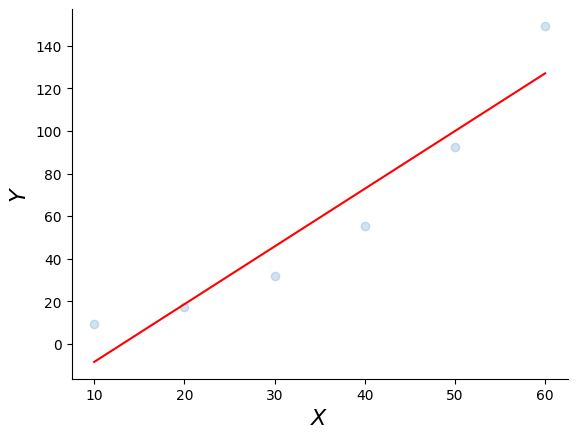

In [14]:
fig = plt.figure()


plt.plot(df1['Temperatura'],df1['Pressao'],'o',color='C0',alpha=0.2,label=r'Dados')
plt.plot(df1['Temperatura'],y_pred1,'r-')
plt.xlabel(r'$X$',fontsize=16)
plt.ylabel(r'$Y$',fontsize=16)

for ax in fig.get_axes():

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


plt.show()

Vemos que a linha da regressão é muito destoante dos dados. Além disso, o modelo possui um p-valor considerável para o teste F. Não é o modelo mais adequado para estes dados.

**b)**

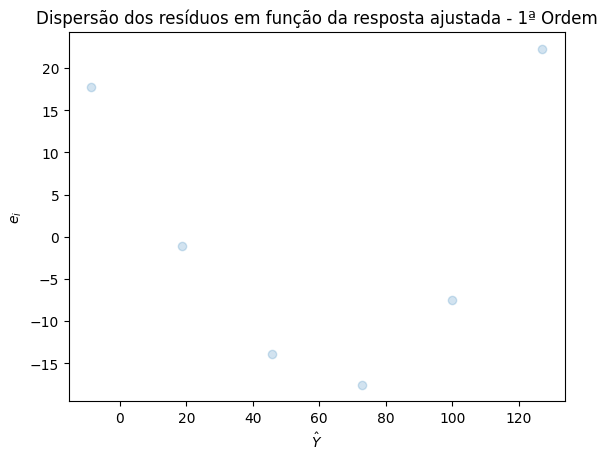

In [15]:
plt.plot(y_pred1,resid1,'o',color='C0',alpha=0.2)
plt.xlabel(r'$\hat{Y}$',fontsize=10)
plt.ylabel(r'$e_i$',fontsize=10)
plt.title(r'Dispersão dos resíduos em função da resposta ajustada - 1ª Ordem',fontsize=12)

plt.show()

Vemos aqui que os resíduos assumem valores numa faixa muito ampla e aleatória, não se centrando em torno de 0. Também percebemos que seguem um padrão em formato de uma parábola com concavidade para cima, mais um indicador de que os resíduos não tem distribuição normal com média 0 e desvio padrão 1, reiterando que o modelo não é adequado para os dados.

**c) e d)**

Modelo 2 (Segunda Ordem):

$$ Y = \beta_0 + X \beta_1 + X^2\beta_{1,1} + \varepsilon $$

$$ \texttt{pressão} = \beta_0 + \beta_1 \times \texttt{temperatura} + \beta_{1,1} \times \texttt{temperatura}^2 + \varepsilon $$

In [16]:
model2 = smf.ols(formula='Pressao ~ Temperatura + I(Temperatura**2)', data=df1)
result2 = model2.fit()

y_pred2 = result2.predict()
resid2 = result2.resid

result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Pressao   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     566.4
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           0.000136
Time:                        00:42:11   Log-Likelihood:                -14.022
No. Observations:                   6   AIC:                             34.04
Df Residuals:                       3   BIC:                             33.42
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              20.1000      6.336      3.172      0.050      -0.064      40.264
Temperatura            -1.4696      0.415     -3.545      0.038      -2.789      -0.150
I(Temperatura ** 2)     0.0597      0.006     10.307      0.002       0.041       0.078
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.063
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.774
Skew:                          -0.120   Prob(JB):                        0.679
Kurtosis:                       1.257   Cond. No.                     8.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

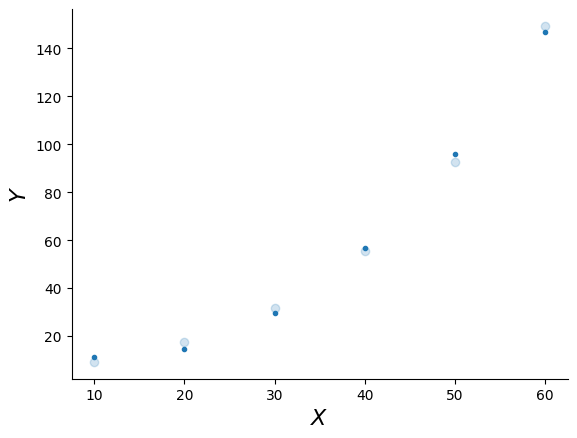

In [17]:
fig = plt.figure()


plt.plot(df1['Temperatura'],df1['Pressao'],'o',color='C0',alpha=0.2,label=r'Dados')
plt.plot(df1['Temperatura'],y_pred2,'.')
plt.xlabel(r'$X$',fontsize=16)
plt.ylabel(r'$Y$',fontsize=16)

for ax in fig.get_axes():

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


plt.show()

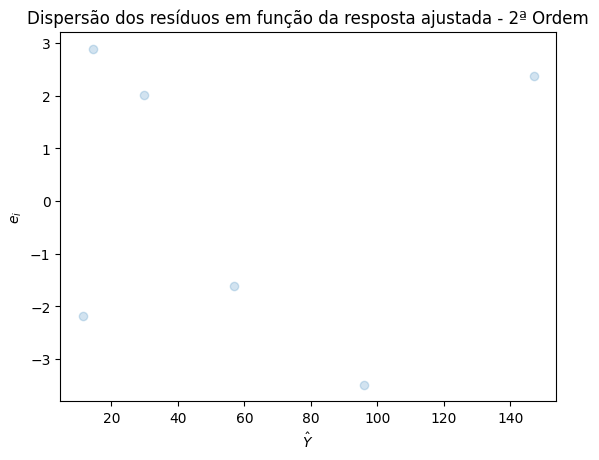

In [18]:
plt.plot(y_pred2,resid2,'o',color='C0',alpha=0.2)
plt.xlabel(r'$\hat{Y}$',fontsize=10)
plt.ylabel(r'$e_i$',fontsize=10)
plt.title(r'Dispersão dos resíduos em função da resposta ajustada - 2ª Ordem',fontsize=12)

plt.show()

Para este modelo vemos uma maior adequabilidade, com a resposta ajustada sendo bem próxima aos dados reais e os resíduos distribuídos de maneira normal em torno de 0.

## **Questão 3**

**a)**

In [19]:
df2 = pd.read_csv('dados_genericos.csv')

df2.head()

,Y,x1,x2,x3
0,0.222,7.3,0.0,0.0
1,0.395,8.7,0.0,0.3
2,0.422,8.8,0.7,1.0
3,0.437,8.1,4.0,0.2
4,0.428,9.0,0.5,1.0


In [20]:
X = df2.drop(columns='Y')
X.head()

,x1,x2,x3
0,7.3,0.0,0.0
1,8.7,0.0,0.3
2,8.8,0.7,1.0
3,8.1,4.0,0.2
4,9.0,0.5,1.0


In [21]:
poly = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly.fit_transform(X)
X_poly

array([[7.3000e+00, 0.0000e+00, 0.0000e+00, 5.3290e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [8.7000e+00, 0.0000e+00, 3.0000e-01, 7.5690e+01, 0.0000e+00,
        2.6100e+00, 0.0000e+00, 0.0000e+00, 9.0000e-02],
       [8.8000e+00, 7.0000e-01, 1.0000e+00, 7.7440e+01, 6.1600e+00,
        8.8000e+00, 4.9000e-01, 7.0000e-01, 1.0000e+00],
       [8.1000e+00, 4.0000e+00, 2.0000e-01, 6.5610e+01, 3.2400e+01,
        1.6200e+00, 1.6000e+01, 8.0000e-01, 4.0000e-02],
       [9.0000e+00, 5.0000e-01, 1.0000e+00, 8.1000e+01, 4.5000e+00,
        9.0000e+00, 2.5000e-01, 5.0000e-01, 1.0000e+00],
       [8.7000e+00, 1.5000e+00, 2.8000e+00, 7.5690e+01, 1.3050e+01,
        2.4360e+01, 2.2500e+00, 4.2000e+00, 7.8400e+00],
       [9.3000e+00, 2.1000e+00, 1.0000e+00, 8.6490e+01, 1.9530e+01,
        9.3000e+00, 4.4100e+00, 2.1000e+00, 1.0000e+00],
       [7.6000e+00, 5.1000e+00, 3.4000e+00, 5.7760e+01, 3.8760e+01,
        2.5840e+01, 2.6010e+01, 1.7340e+01, 1.1560e+01],


In [22]:
colunas_poly = poly.get_feature_names_out(['x1', 'x2', 'x3'])
X_poly_df = pd.DataFrame(X_poly, columns=colunas_poly)
X_poly_df.head()

,x1,x2,x3,x1^2,x1 x2,x1 x3,x2^2,x2 x3,x3^2
0,7.3,0.0,0.0,53.29,0.00,0.00,0.00,0.0,0.00
1,8.7,0.0,0.3,75.69,0.00,2.61,0.00,0.0,0.09
2,8.8,0.7,1.0,77.44,6.16,8.80,0.49,0.7,1.00
3,8.1,4.0,0.2,65.61,32.40,1.62,16.00,0.8,0.04
4,9.0,0.5,1.0,81.00,4.50,9.00,0.25,0.5,1.00


In [23]:
df2 = df2.drop(columns=['x1','x2','x3'])

In [24]:
df2 = X_poly_df.join(df2)

df2.rename(columns={"x1 x2": "x1x2"}, inplace=True)
df2.rename(columns={"x1 x3": "x1x3"}, inplace=True)
df2.rename(columns={"x2 x3": "x2x3"}, inplace=True)
df2.rename(columns={"x1^2": "x1sq"}, inplace=True)
df2.rename(columns={"x2^2": "x2sq"}, inplace=True)
df2.rename(columns={"x3^2": "x3sq"}, inplace=True)


df2.head()

,x1,x2,x3,x1sq,x1x2,x1x3,x2sq,x2x3,x3sq,Y
0,7.3,0.0,0.0,53.29,0.00,0.00,0.00,0.0,0.00,0.222
1,8.7,0.0,0.3,75.69,0.00,2.61,0.00,0.0,0.09,0.395
2,8.8,0.7,1.0,77.44,6.16,8.80,0.49,0.7,1.00,0.422
3,8.1,4.0,0.2,65.61,32.40,1.62,16.00,0.8,0.04,0.437
4,9.0,0.5,1.0,81.00,4.50,9.00,0.25,0.5,1.00,0.428


In [25]:
model = smf.ols(formula='Y ~ x1 + x2 + x3 + x1sq + x1x2 + x1x3 + x2sq + x2x3 + x3sq', data=df2)
result = model.fit()

y_pred = result.predict()
resid = result.resid

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     19.63
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           5.05e-07
Time:                        00:42:12   Log-Likelihood:                 42.171
No. Observations:                  26   AIC:                            -64.34
Df Residuals:                      16   BIC:                            -51.76
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7694      1.287     -1.375      0.188      -4.498       0.959
x1             0.4208      0.294      1.430      0.172      -0.203       1.044
x2             0.2225      0.131      1.701      0.108      -0.055       0.500
x3            -0.1280      0.070     -1.822      0.087      -0.277       0.021
x1sq          -0.0193      0.017     -1.150      0.267      -0.055       0.016
x1x2          -0.0199      0.012     -1.651      0.118      -0.045       0.006
x1x3           0.0092      0.008      1.201      0.247      -0.007       0.025
x2sq          -0.0074      0.012     -0.618      0.545      -0.033       0.018
x2x3           0.0026      0.007      0.366      0.719      -0.012       0.017
x3sq           0.0008      0.001      0.572      0.575      -0.002       0.004
==============================================================================
Omnibus:                        7.929   Durbin-Watson:                   2.130
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                6.142
Skew:                           1.136   Prob(JB):                       0.0464
Kurtosis:                       3.710   Cond. No.                     1.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Equação do Modelo:

$$ Y = -1.7694 + 0.4208X_1 + 0.2225X_2 - 0.1280X_3 - 0.0193X_1^2 - 0.0074X_2^2 + 0.0008X_3^2 - 0.0199X_1X_2 + 0.0092X_1X_3 + 0.0026X_2X_3 + \varepsilon $$

**b)**

In [45]:
import scipy.stats as st
st.f.ppf(0.95,9,16)

2.5376665388806527

Uma vez que $f=2.54 < 19.63 =f^*$, rejeita-se $H_0:{{\beta}_1 = {\beta}_2 = {\beta}_3 = {\beta}_4 = {\beta}_5 = {\beta}_6 = {\beta}_7 = {\beta}_8 = {\beta}_9} = 0$ com 95% de confiança.

In [27]:
t = abs(st.t.ppf(0.025,16))
t

2.1199052992210112

$ t_{\beta_0} = -1.375 \\
t_{\beta_1} = 1.430 \\
t_{\beta_2} = 1.701 \\
t_{\beta_3} = -1.822 \\
t_{\beta_{1,1}} = -1.150 \\
t_{\beta_{2,2}} = -0.618 \\
t_{\beta_{3.3}} = 0.572 \\
t_{\beta_{1,2}} = -1.651 \\
t_{\beta_{1,3}} = 1.201 \\
t_{\beta_{2,3}} = 0.366 \\
$

Uma vez que para todos os coeficientes $|t=±2.119| > |t^*|$, não se rejeita $H_0:{{\beta}_1 = {\beta}_2 = {\beta}_3 = {\beta}_4 = {\beta}_5 = {\beta}_6 = {\beta}_7 = {\beta}_8 = {\beta}_9} = 0$, com 95% de confiança.

**c)**

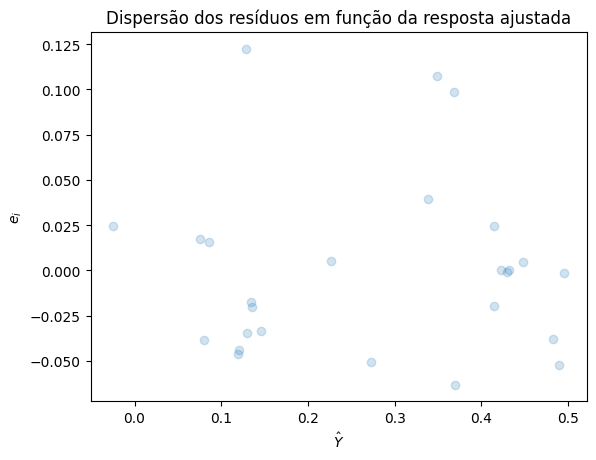

In [28]:
plt.plot(y_pred,resid,'o',color='C0',alpha=0.2)
plt.xlabel(r'$\hat{Y}$',fontsize=10)
plt.ylabel(r'$e_i$',fontsize=10)
plt.title(r'Dispersão dos resíduos em função da resposta ajustada',fontsize=12)

plt.show()

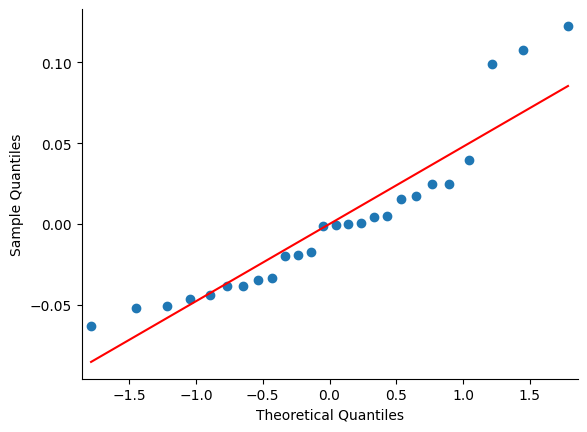

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
sm.qqplot(resid,line='s',ax = ax)

for ax in fig.get_axes():

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


plt.show()

Vemos que no gráfico de dispersão os resíduos estão bem distribuídos em torno de 0, com alguns outliers. Apesar disso, o QQ-Plot nos mostra um padrão de "escadinha", o que pode indicar a também presença de outliers, caudas mais leves ou simplesmente uma não-normalidade na distribuição dos resíduos, o que pode contestar a adequabilidade do modelo.

**d)**

In [57]:
anova_results = sm.stats.anova_lm(result,typ=2)
anova_results

,sum_sq,df,F,PR(>F)
x1,0.007595,1.0,2.046180,0.171828
x2,0.010745,1.0,2.894972,0.108205
x3,0.012323,1.0,3.320127,0.087182
x1sq,0.004913,1.0,1.323630,0.266847
x1x2,0.010120,1.0,2.726498,0.118183
x1x3,0.005352,1.0,1.441866,0.247313
x2sq,0.001419,1.0,0.382235,0.545111
x2x3,0.000497,1.0,0.133936,0.719179
x3sq,0.001213,1.0,0.326915,0.575427
Residual,0.059386,16.0,NaN,NaN


In [43]:
import scipy.stats as st
st.f.ppf(0.95,1,16)

4.493998477666352

Uma vez que para todos os coeficientes $f=4.494 > f^*$, não se rejeita $H_0:{{\beta}_1 = {\beta}_2 = {\beta}_3 = {\beta}_4 = {\beta}_5 = {\beta}_6 = {\beta}_7 = {\beta}_8 = {\beta}_9} = 0$, com 95% de confiança.

## **Questão 4**

**a)**

In [32]:
df3 = pd.read_csv('dados_comunidades_mobilidade.csv')

df3.head()

,Unnamed: 0,Name,Mobility,State,Commute,Longitude,Latitude
0,1,Johnson City,0.062199,TN,0.325,-82.436386,36.470371
1,2,Morristown,0.053652,TN,0.276,-83.407249,36.096539
2,3,Middlesborough,0.072635,TN,0.359,-83.535332,36.551540
3,4,Knoxville,0.056281,TN,0.269,-84.242790,35.952259
4,5,Winston-Salem,0.044801,NC,0.292,-80.505333,36.081276


In [33]:
model3_1 = smf.ols(formula='Mobility ~ Commute',data=df3)
result3_1 = model3_1.fit()

y_pred3_1 = result3_1.predict()
resid3_1 = result3_1.resid

result3_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Mobility   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     389.5
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           9.38e-70
Time:                        00:42:13   Log-Likelihood:                 1268.7
No. Observations:                 729   AIC:                            -2533.
Df Residuals:                     727   BIC:                            -2524.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0002      0.005     -0.037      0.971      -0.011       0.010
Commute        0.2219      0.011     19.735      0.000       0.200       0.244
==============================================================================
Omnibus:                      265.914   Durbin-Watson:                   1.354
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1989.480
Skew:                           1.440   Prob(JB):                         0.00
Kurtosis:                      10.563   Cond. No.                         8.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Modelo 1:

$$ Y = -0.0002 + 0.2219X + \varepsilon $$

$$ \texttt{Mobility} = \beta_0 + \beta_1 \times \texttt{Commute} + \varepsilon $$

In [34]:
model3_2 = smf.ols(formula='Mobility ~ I(Commute**2)',data=df3)
result3_2 = model3_2.fit()

y_pred3_2 = result3_2.predict()
resid3_2 = result3_2.resid

result3_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Mobility   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     374.9
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           1.13e-67
Time:                        00:42:13   Log-Likelihood:                 1263.9
No. Observations:                 729   AIC:                            -2524.
Df Residuals:                     727   BIC:                            -2515.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0504      0.003     16.623      0.000       0.044       0.056
I(Commute ** 2)     0.2221      0.011     19.362      0.000       0.200       0.245
==============================================================================
Omnibus:                      236.851   Durbin-Watson:                   1.328
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2083.876
Skew:                           1.200   Prob(JB):                         0.00
Kurtosis:                      10.928   Cond. No.                         7.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Modelo 2:

$$ Y = 0.0504 + 0.2221X^2 + \varepsilon $$

$$ \texttt{Mobility} = \beta_0 + \beta_1 \times \texttt{Commute}^2 + \varepsilon $$

In [35]:
model3_3 = smf.ols(formula='Mobility ~ Commute + I(Commute**2)',data=df3)
result3_3 = model3_3.fit()

y_pred3_3 = result3_3.predict()
resid3_3 = result3_3.resid

result3_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Mobility   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     194.5
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           2.28e-68
Time:                        00:42:13   Log-Likelihood:                 1268.7
No. Observations:                 729   AIC:                            -2531.
Df Residuals:                     726   BIC:                            -2518.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0029      0.016      0.185      0.854      -0.028       0.033
Commute             0.2080      0.067      3.108      0.002       0.077       0.339
I(Commute ** 2)     0.0142      0.068      0.210      0.834      -0.119       0.147
==============================================================================
Omnibus:                      264.016   Durbin-Watson:                   1.353
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1992.342
Skew:                           1.425   Prob(JB):                         0.00
Kurtosis:                      10.581   Cond. No.                         68.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Modelo 3:

$$ Y = 0.0029 + 0.2080X + 0.0142X^2 + \varepsilon $$

$$ \texttt{Mobility} = \beta_0 + \beta_1 \times \texttt{Commute} + \beta_2 \times \texttt{Commute}^2 + \varepsilon $$

Vemos que o melhor modelo para este caso é o Modelo 1, visto que apresenta o menor valor de AIC e do p-valor para o teste F de significância da regressão.

**b)**

In [36]:
# Calcular a correlação entre Xi e Xi^2
corrX = np.corrcoef(df3['Commute'], df3['Commute']**2)[0, 1]
corrX

0.9857744398317728

In [37]:
# Centro dos valores de Xi em torno da média
X_mean = df3['Commute'].mean()
Z_i = df3['Commute'] - X_mean

# Recalcular a correlação entre Zi e Z2i
corrZ = np.corrcoef(Z_i, Z_i**2)[0, 1]
corrZ

0.36786725403208936

Observa-se uma mudança significativa nas correlações, saindo de uma relação positiva quase perfeita para um valor mais baixo.

**c)**

In [38]:
df3['Z'] = Z_i
df3.head()

,Unnamed: 0,Name,Mobility,State,Commute,Longitude,Latitude,Z
0,1,Johnson City,0.062199,TN,0.325,-82.436386,36.470371,-0.128513
1,2,Morristown,0.053652,TN,0.276,-83.407249,36.096539,-0.177513
2,3,Middlesborough,0.072635,TN,0.359,-83.535332,36.551540,-0.094513
3,4,Knoxville,0.056281,TN,0.269,-84.242790,35.952259,-0.184513
4,5,Winston-Salem,0.044801,NC,0.292,-80.505333,36.081276,-0.161513


In [39]:
model3_4 = smf.ols(formula='Mobility ~ Z + I(Z**2)',data=df3)
result3_4 = model3_4.fit()

y_pred3_4 = result3_4.predict()
resid3_4 = result3_4.resid

result3_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Mobility   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     194.5
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           2.28e-68
Time:                        00:42:13   Log-Likelihood:                 1268.7
No. Observations:                 729   AIC:                            -2531.
Df Residuals:                     726   BIC:                            -2518.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1001      0.002     48.550      0.000       0.096       0.104
Z              0.2209      0.012     18.262      0.000       0.197       0.245
I(Z ** 2)      0.0142      0.068      0.210      0.834      -0.119       0.147
==============================================================================
Omnibus:                      264.016   Durbin-Watson:                   1.353
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1992.342
Skew:                           1.425   Prob(JB):                         0.00
Kurtosis:                      10.581   Cond. No.                         43.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observa-se que não há uma mudança significativa nos valores dos coeficientes, exceto pelo intercepto. Mesmo assim, os desvios padrões continuam bem próximos. Desse modo, vemos que a mudança de variável não fez tanta diferença neste caso.

**d)**

In [40]:
south = ["VA", "FL", "GA", "AR", "AL", "LA", "MS", "NC", "SC", "TN", "TX"]

df3['State'] = ['South' if state in south else 'North' for state in df3['State']]

df3.head()

,Unnamed: 0,Name,Mobility,State,Commute,Longitude,Latitude,Z
0,1,Johnson City,0.062199,South,0.325,-82.436386,36.470371,-0.128513
1,2,Morristown,0.053652,South,0.276,-83.407249,36.096539,-0.177513
2,3,Middlesborough,0.072635,South,0.359,-83.535332,36.551540,-0.094513
3,4,Knoxville,0.056281,South,0.269,-84.242790,35.952259,-0.184513
4,5,Winston-Salem,0.044801,South,0.292,-80.505333,36.081276,-0.161513


In [41]:
model3_5 = smf.ols(formula='Mobility ~ Commute + I(Commute**2) + C(State)',data=df3)
result3_5 = model3_5.fit()

y_pred3_5 = result3_5.predict()
resid3_5 = result3_5.resid

result3_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Mobility   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     149.1
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           3.08e-75
Time:                        00:42:13   Log-Likelihood:                 1287.4
No. Observations:                 729   AIC:                            -2567.
Df Residuals:                     725   BIC:                            -2548.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0302      0.016      1.908      0.057      -0.001       0.061
C(State)[T.South]    -0.0220      0.004     -6.181      0.000      -0.029      -0.015
Commute               0.1451      0.066      2.196      0.028       0.015       0.275
I(Commute ** 2)       0.0510      0.066      0.768      0.443      -0.079       0.181
==============================================================================
Omnibus:                      286.121   Durbin-Watson:                   1.387
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2396.003
Skew:                           1.535   Prob(JB):                         0.00
Kurtosis:                      11.334   Cond. No.                         72.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
t = (stats.t.ppf(0.025,726))
t

-1.9632369374638876

Uma vez que $|t=±1.963| > |t^* = -6.181|$, rejeita-se $H_0:{{\beta}_{State}} = 0$, com 95% de confiança. Ademais, podemos ver que este modelo possui valores ainda menores de AIC e p-valor do teste F de significância que aqueles traçados inicialmente, reiterando sua adequabilidade e utilidade da nova variável categórica.